2024 - 7 - 29

1446, ٱلْمُحَرَّم 23

Medical Data Visualizer

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Data = pd.read_csv('medical_examination.csv')

In [3]:
Data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
Data.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
Data['BMI'] = Data['weight'] / ((Data['height'] / 100) ** 2)
Data['over weight'] = Data['BMI'] > 25
Data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,over weight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,True
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,True
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,True
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,True
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,True


In [6]:
overweight_counts = Data['over weight'].value_counts()
overweight_counts

over weight
True     43546
False    26454
Name: count, dtype: int64

In [7]:
Data.loc[Data['cholesterol'] > 1, 'cholesterol'] = 1
Data.loc[Data['gluc'] > 1, 'gluc'] = 1
Data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,over weight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,False
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,34.927679,True
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,23.507805,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,True
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,True
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,31.353579,True
69998,99998,22431,1,163,72.0,135,80,1,1,0,0,0,1,27.099251,True


In [8]:
Long_Data = pd.melt(Data, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'over weight'])

In [9]:
Prep_data = Long_Data.groupby(['cardio','variable', 'value']).size().reset_index()
Prep_data

,cardio,variable,value,0
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,1,35021
5,0,gluc,1,35021
6,0,over weight,0,15915
7,0,over weight,1,19106
8,0,smoke,0,31781
9,0,smoke,1,3240


In [10]:
Prep_data = Prep_data.rename(columns = {0:'total'})
Prep_data

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,1,35021
5,0,gluc,1,35021
6,0,over weight,0,15915
7,0,over weight,1,19106
8,0,smoke,0,31781
9,0,smoke,1,3240


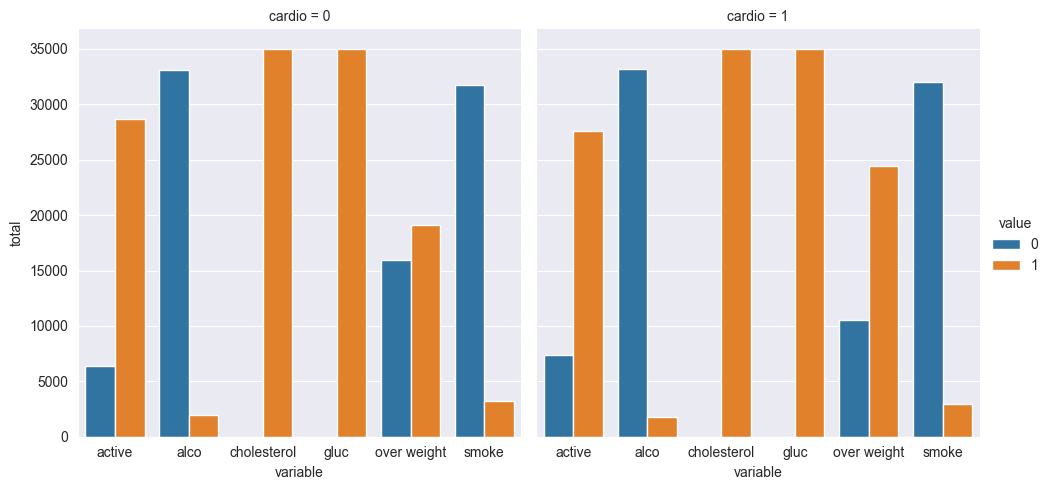

In [11]:
Histogram = sns.catplot(data=Prep_data, x='variable', y = 'total', kind='bar', hue='value', col='cardio')

In [12]:
Clean_Data = Data[
    (Data['height'] >= Data['height'].quantile(0.025)) &
    (Data['height'] <= Data['height'].quantile(0.975)) &
    (Data['weight'] >= Data['weight'].quantile(0.025)) &
    (Data['weight'] <= Data['weight'].quantile(0.975))
]

Clean_Data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,over weight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,False
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,34.927679,True
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,23.507805,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,23.661439,False
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,True
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,True
69998,99998,22431,1,163,72.0,135,80,1,1,0,0,0,1,27.099251,True


In [30]:
corr = Clean_Data.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,over weight
id,1.000000,0.002181,0.003944,-0.000097,0.000714,0.003768,-0.000422,NaN,NaN,-0.002818,-0.000276,0.006091,0.004021,0.000739,0.000023
age,0.002181,1.000000,-0.017757,-0.077590,0.069472,0.019151,0.019548,NaN,NaN,-0.044278,-0.027868,-0.011416,0.239394,0.109919,0.089305
sex,0.003944,-0.017757,1.000000,0.506438,0.130171,0.005237,0.012525,NaN,NaN,0.337130,0.168511,0.007671,0.003329,-0.135703,-0.052544
height,-0.000097,-0.077590,0.506438,1.000000,0.251133,0.004407,-0.000828,NaN,NaN,0.187817,0.089369,-0.005360,-0.024265,-0.266523,-0.148975
weight,0.000714,0.069472,0.130171,0.251133,1.000000,0.027942,0.036711,NaN,NaN,0.056728,0.059849,-0.014171,0.172027,0.862728,0.655964
ap_hi,0.003768,0.019151,0.005237,0.004407,0.027942,1.000000,0.014851,NaN,NaN,-0.001523,0.000792,0.000176,0.051712,0.025922,0.018184
ap_lo,-0.000422,0.019548,0.012525,-0.000828,0.036711,0.014851,1.000000,NaN,NaN,0.004979,0.011984,0.004747,0.063658,0.037183,0.027389
cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoke,-0.002818,-0.044278,0.337130,0.187817,0.056728,-0.001523,0.004979,NaN,NaN,1.000000,0.341345,0.027790,-0.019529,-0.041429,-0.003254


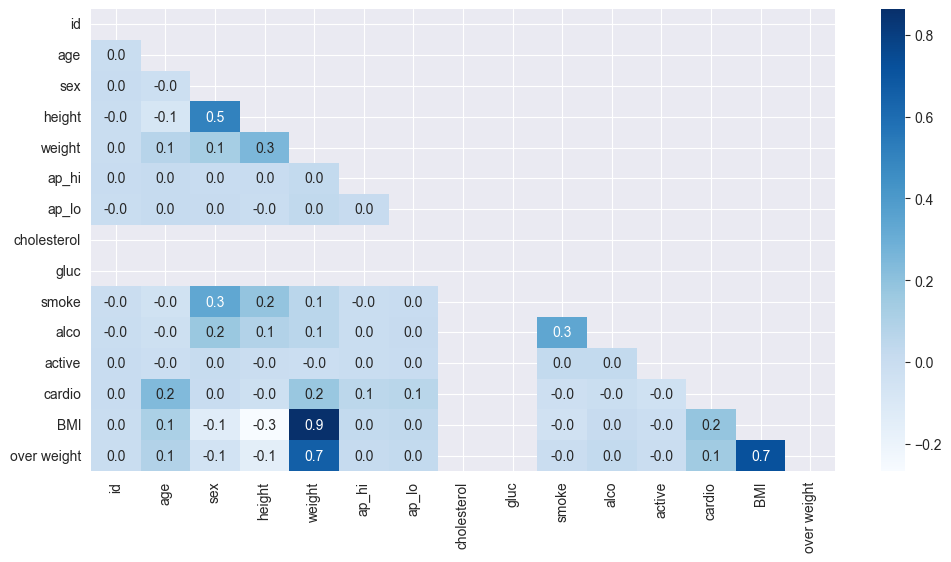

In [48]:
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(12,6))
Heatmap = sns.heatmap(corr, mask=mask, annot=True, fmt="0.1f", cmap="Blues")